### Importing Necessary Libraries and Creating directory to store the images

In [160]:
import requests
import numpy as np
from bs4 import BeautifulSoup as bs
import urllib.request
import os

Fruits = ["banana fruit","orange  fruit"]

for fruit in Fruits:
    os.mkdir("images/"+fruit)


### Scraping fruit images from Unsplash.com using Beautiful Soup

In [15]:
def get_images(fruit):
    url = "https://unsplash.com/s/photos/"+fruit
    page_html = requests.get(url)
    soup = bs(page_html.text)
    image_thumb = soup.find_all("a",itemprop="contentUrl")
    images=[]
    for elements in image_thumb:
        images.append(elements.get("href"))

    i=0
    for index,image_link in enumerate(images):
        if i<10:
            endpoint ="https://unsplash.com"+images[i]+"/download?force=true"
            urllib.request.urlretrieve(endpoint,"images/"+fruit+"/"+str(index+1)+".jpg")
            i += 1




for fruit in Fruits:
    get_images(fruit)    
  

### Loading the Images followed by Rescaling and flattening

In [104]:
from skimage.transform import resize
from skimage.io import imread

target = []
images = []
flat_data = []

Datadir = "images/"

for fruit in Fruits:
    class_num = Fruits.index(fruit)
    
    path = os.path.join(Datadir,fruit)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        img_resized = resize(img_array,(100,100,3))
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(class_num)
        print(img+" done")
    print(fruit+" done")
        
target = np.array(target)
images = np.array(images)
flat_data = np.array(flat_data)


1.jpg done
10.jpg done
2.jpg done
3.jpg done
4.jpg done
5.jpg done
6.jpg done
7.jpg done
8.jpg done
9.jpg done
banana fruit done
1.jpg done
10.jpg done
2.jpg done
3.jpg done
4.jpg done
5.jpg done
6.jpg done
7.jpg done
8.jpg done
9.jpg done
orange  fruit done


In [105]:
import pandas as pd
df = pd.DataFrame(flat_data)
#Adding output to dataframe
df['Fruit type'] = target

df

,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,Fruit type
0,0.988235,1.000000,1.000000,0.988235,1.000000,1.000000,0.988235,1.000000,1.000000,0.988235,...,0.988235,1.000000,1.000000,0.988235,1.000000,1.000000,0.988235,1.000000,1.000000,0
1,0.082353,0.082353,0.086275,0.082353,0.082353,0.082353,0.082353,0.082353,0.086275,0.082353,...,0.054902,0.043137,0.043137,0.054902,0.047059,0.043137,0.058824,0.047059,0.047059,0
2,0.788235,0.603922,0.388235,0.792157,0.607843,0.396078,0.792157,0.607843,0.396078,0.792157,...,0.823529,0.650980,0.458824,0.819608,0.647059,0.454902,0.819608,0.647059,0.450980,0
3,0.235294,0.227451,0.239216,0.239216,0.235294,0.243137,0.247059,0.239216,0.247059,0.250980,...,0.160000,0.124706,0.094118,0.109804,0.094118,0.090196,0.105882,0.090196,0.086275,0
4,0.901961,0.690196,0.070588,0.901961,0.698039,0.070588,0.901961,0.701961,0.074510,0.905882,...,0.988235,0.905882,0.341176,0.984314,0.901961,0.345098,0.984314,0.901961,0.345098,0
5,0.019608,0.015686,0.007843,0.019608,0.015686,0.007843,0.019608,0.015686,0.007843,0.019608,...,0.047059,0.027451,0.015686,0.047059,0.027451,0.015686,0.047059,0.029146,0.015686,0
6,0.901961,0.909804,0.913725,0.901961,0.909804,0.913725,0.901961,0.905882,0.913725,0.901961,...,0.890196,0.894118,0.901961,0.890196,0.894118,0.901961,0.890196,0.894118,0.901961,0
7,0.909804,0.658824,0.282353,0.913725,0.666667,0.294118,0.913725,0.666667,0.294118,0.909804,...,0.945098,0.705882,0.356863,0.941176,0.701961,0.349020,0.945098,0.709804,0.356863,0
8,0.760784,0.180392,0.117647,0.764706,0.180392,0.121569,0.772549,0.184314,0.125490,0.780392,...,0.745098,0.152941,0.050980,0.737255,0.149020,0.050980,0.729412,0.144118,0.043137,0
9,0.000000,0.364706,0.352941,0.000000,0.372549,0.360784,0.000000,0.380392,0.368627,0.000000,...,0.003922,0.443137,0.423529,0.003922,0.443137,0.423529,0.003922,0.443137,0.423529,0


In [106]:
#Input
x = df.iloc[:,0:-1].values
#Output
y = df.iloc[:,-1].values

### Splitting the Data into Training and Testing Sets

In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
print(x_train.shape)
print(x_test.shape)

(15, 30000)
(5, 30000)


### Set Distribution

In [114]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([8, 7], dtype=int64))

In [115]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([2, 3], dtype=int64))

### Training an SVM Model with Hyperparameter Tuning 

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid =[
                {'C':[1,10,100,1000],'kernel': ['linear']},
                {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel': ['rbf']}
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc, param_grid, verbose=1, n_jobs=-1)
clf.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished


GridSearchCV(estimator=SVC(probability=True), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             verbose=1)

In [185]:
y_test

array([1, 0, 1, 0, 1])

In [174]:
new_pred = clf.predict(x_test)
new_pred

array([1, 1, 1, 0, 1])

### Checking Accuracy

In [167]:
from sklearn.metrics import accuracy_score
accuracy_score(new_pred,y_test)

0.8

### Testing the Model by getting images from external Sources

In [186]:
def Test():
    flat_new_img = []
    img_url = input("Enter the image URL")
    img = imread(img_url)
    img_resized = resize(img,(100,100,3))
    flat_new_img.append(img_resized.flatten())
    flat_new_img = np.array(flat_new_img)
    print(img.shape)
    plt.imshow(img_resized)
    Predicted = clf.predict(flat_new_img)
    y_out = clf.predict(flat_new_img)
    y_out = Fruits[y_out[0]]
    print("Predicted Output: "+y_out)

Enter the image URLhttps://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Banana_and_cross_section.jpg/250px-Banana_and_cross_section.jpg
(90, 250, 3)
Predicted Output: banana fruit


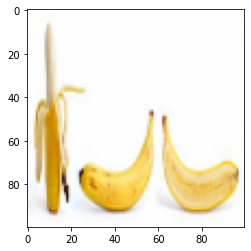

In [187]:
Test()

Enter the image URLhttps://image.shutterstock.com/image-photo/two-slices-orange-fruit-seeds-600w-1060096973.jpg
(357, 600, 3)
Predicted Output: orange  fruit


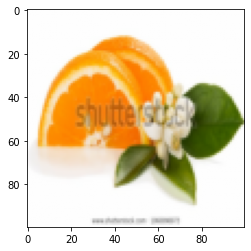

In [190]:
Test()

Enter the image URLhttps://image.shutterstock.com/image-photo/fresh-slice-orange-fruit-green-260nw-1030877566.jpg
(280, 260, 3)
Predicted Output: orange  fruit


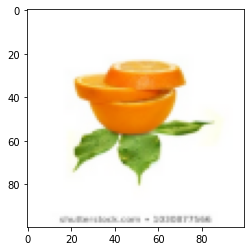

In [191]:
Test()

Enter the image URLhttps://i.ndtvimg.com/i/2016-04/banana-625_625x350_41459935133.jpg
(350, 625, 3)
Predicted Output: banana fruit


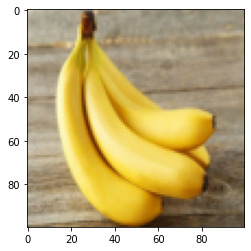

In [193]:
Test()